# Classification with softmax in PyTorch

Welcome to the `03_softmax_classification` notebook. This entry in the portfolio aims to demonstrate core principles of softmax classification — a technique for categorizing data into multiple classes.

This notebook delves into areas such as constructing and training a softmax classification model and assessing its performance. Additionally, it has sections and questions/answers on optimization strategies and best practices to enhance model precision and effectiveness.

## Table of contents

1. [Understanding softmax classifiication](#understanding-softmax-classification)
2. [Setting up the environment](#setting-up-the-environment)
3. [Generating synthetic data](#generating-synthetic-data)
4. [Defining the softmax classification model](#defining-the-softmax-classification-model)
5. [Loss function and optimizer](#loss-function-and-optimizer)
6. [Training the softmax classification model](#training-the-softmax-classification-model)
7. [Evaluating the model](#evaluating-the-model)
8. [Saving and loading the model](#saving-and-loading-the-model)
9. [Optimizations](#optimizations)
10. [Handling real-world data](#handling-real-world-data)
11. [Further exercises](#further-exercises)

## Understanding softmax classification

Softmax classification is a method used for categorizing input data into multiple classes. Unlike linear regression, which predicts a continuous output, softmax classification aims to assign probabilities to each class, allowing the model to classify input data into the most likely category.

### **Key concepts**

#### **Binary vs. multiclass classification**
- **Binary classification**: Involves two possible output classes. The model predicts which of the two classes the input data belongs to.
- **Multiclass classification**: Involves more than two output classes. The model assigns a probability to each class and classifies the input data based on the highest probability.

#### **The softmax function**
The softmax function is a generalization of the logistic function that squashes the outputs of each class into a range between 0 and 1, representing probabilities, and ensures that the sum of all probabilities equals 1. It is defined as:

$$ \text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}} $$

where $ z_i $ is the raw output (logits) of the model for class $ i $, and $ K $ is the total number of classes.

#### **Model parameters**
Softmax classification models consist of weights (coefficients) and biases. The weights represent the relationship between each input feature and each class, while the biases account for the base probability of each class when all input features are zero.

#### **Assumptions of softmax classification**
For softmax classification to be effective, the main assumptions that should be considered are:
- **Independence of input features**: The features should be independent of each other.
- **Adequate data representation**: The input data should adequately represent all classes to avoid bias in classification.
- **No multicollinearity**: Features should not be highly correlated, as this can lead to redundancy and affect model performance.

#### **Model evaluation**
Evaluating the performance of a softmax classification model involves various metrics, including:
- **Accuracy**: The proportion of correctly predicted instances out of the total instances.
- **Precision, recall, and F1 score**: Metrics that provide insights into the performance of the model for each class, particularly in cases of imbalanced datasets.
- **Confusion matrix**: A table that shows the true positive, false positive, true negative, and false negative predictions, helping to visualize the performance of the classification model.

#### **Overfitting and underfitting**
- **Overfitting**: Occurs when the model learns the noise and specific details of the training data, leading to poor performance on new, unseen data. This usually happens when the model is too complex.
- **Underfitting**: Happens when the model is too simple to capture the underlying patterns in the data, resulting in poor performance on both training and new data.

#### **Regularization**
Regularization techniques help prevent overfitting by adding a penalty to the model's complexity. Common methods include:
- **L2 regularization (Ridge)**: Adds a penalty proportional to the square of the coefficients, discouraging large coefficients and thus, reducing model complexity.
- **L1 regularization (Lasso)**: Adds a penalty proportional to the absolute value of the coefficients, which can lead to sparsity in the model, meaning some coefficients may be exactly zero, simplifying the model.

## Setting up the environment

##### **Q1: How do you install the necessary PyTorch libraries using a Jupyter notebook?**

In [1]:
# !pip install torch torchvision torchaudio

##### **Q2: How do you import the required modules for softmax classification?**

In [2]:
import torch
import torchvision
import torchaudio
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

##### **Q3: How do you verify the installation and versions of the installed libraries?**

In [3]:
print(torch.__version__)
print(torchvision.__version__)
print(torchaudio.__version__)

2.3.1+cu121
0.18.1+cu121
2.3.1+cu121


## Generating synthetic data

##### **Q4: How do you create a synthetic dataset for classification tasks in PyTorch?**

In [4]:
from sklearn.datasets import make_classification

n_samples = 2000  # Number of observations
n_features = 5  # Number of features
n_classes = 3  # Number of classes

X, y = make_classification(n_samples=n_samples, n_features=n_features, n_informative=4, n_redundant=0, n_classes=n_classes, random_state=42)  # Generate synthetic data

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

print(X_tensor.shape)
print(y_tensor.shape)

torch.Size([2000, 5])
torch.Size([2000])


##### **Q5: How do you add class labels to the synthetic data?**

In [5]:
n_samples = 2000
n_features = 5
n_classes = 3

X, y = make_classification(n_samples=n_samples, n_features=n_features, n_informative=4, n_redundant=0, n_classes=n_classes, random_state=42)

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

print(X_tensor.shape)
print(y_tensor.shape)

print(X_tensor[:5])
print(y_tensor[:5])  # Print the first few samples and labels to verify

torch.Size([2000, 5])
torch.Size([2000])
tensor([[-0.1005,  0.1446,  0.5783, -0.9204, -0.8718],
        [ 0.3784, -0.0077, -0.4389,  1.4707, -1.2021],
        [ 1.6570, -1.1759,  0.0190,  1.2711,  1.7734],
        [ 0.1987,  0.0924,  0.5023, -0.6487,  0.5914],
        [ 1.5237,  0.5348,  1.0932, -0.8030,  1.7105]])
tensor([1, 1, 0, 1, 2])


##### **Q6: How do you visualize the synthetic dataset using `matplotlib`?**

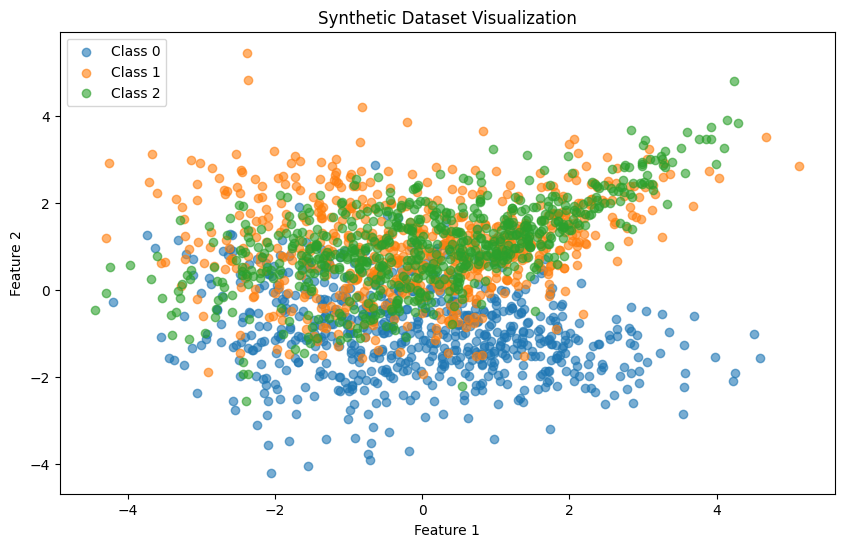

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for i in range(n_classes):
    idx = y == i
    plt.scatter(X[idx, 0], X[idx, 1], label=f'Class {i}', alpha=0.6)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Dataset Visualization')
plt.legend()
plt.show()  # Showing the class labels' distribution via scatterplot

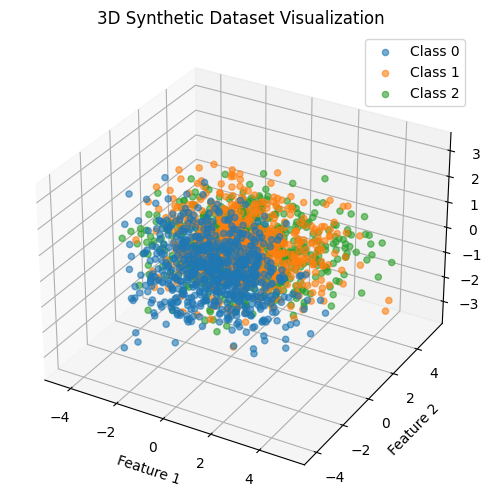

In [7]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
for i in range(n_classes):
    idx = y == i
    ax.scatter(X[idx, 0], X[idx, 1], X[idx, 2], label=f'Class {i}', alpha=0.6)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D Synthetic Dataset Visualization')
ax.legend()
plt.show()  # Option: 3D viz

##### **Q7: How do you split the synthetic data into training and testing sets?**

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

print(X_train_tensor.shape)
print(y_train_tensor.shape)
print(X_test_tensor.shape)
print(y_test_tensor.shape)

torch.Size([1600, 5])
torch.Size([1600])
torch.Size([400, 5])
torch.Size([400])


## Defining the softmax classification model

##### **Q8: How do you define a simple neural network with a softmax output layer using nn.Module in PyTorch?**

In [9]:
class SimpleNN(nn.Module):  # Define the neural network class
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # First fully connected layer
        self.fc2 = nn.Linear(hidden_size, num_classes)  # Second fully connected layer

    def forward(self, x):
        x = F.relu(self.fc1(x))  # Apply ReLU activation function
        x = self.fc2(x)  # Second layer (no activation needed here as softmax is applied later)
        return F.log_softmax(x, dim=1)  # Apply log_softmax activation function for classification

input_size = X_train_tensor.shape[1]  # Number of features
hidden_size = 50  # Number of neurons in the hidden layer
num_classes = 3  # Number of output classes

model = SimpleNN(input_size, hidden_size, num_classes)

##### **Q9: How do you initialize the weights and biases of the softmax classification model?**

In [10]:
import torch.nn.init as init

def initialize_weights(model):  # Define a function for weight initialization with torch.nn.init
    for m in model.modules():
        if isinstance(m, nn.Linear):
            init.xavier_uniform_(m.weight)
            if m.bias is not None:
                init.constant_(m.bias, 0)

model = SimpleNN(input_size, hidden_size, num_classes)

initialize_weights(model) # Apply the initialization function to the model

##### **Q10: How do you add hidden layers to the softmax classification model?**

In [11]:
class ExtendedNN(nn.Module):  # Define the neural network class with additional hidden layers
    def __init__(self, input_size, hidden_sizes, num_classes):
        super(ExtendedNN, self).__init__()
        self.layers = nn.ModuleList()
        current_size = input_size
        for hidden_size in hidden_sizes:
            self.layers.append(nn.Linear(current_size, hidden_size))
            current_size = hidden_size
        self.output_layer = nn.Linear(current_size, num_classes)

    def forward(self, x):
        for layer in self.layers:
            x = F.relu(layer(x))
        x = self.output_layer(x)
        return F.log_softmax(x, dim=1)

In [12]:
input_size = X_train_tensor.shape[1]
hidden_sizes = [50, 30]  # Two hidden layers with 50 and 30 neurons
num_classes = 3
num_epochs = 1000
batch_size = 32

model = ExtendedNN(input_size, hidden_sizes, num_classes)
initialize_weights(model)

## Loss function and optimizer

##### **Q11: How do you define the cross-entropy loss function in PyTorch?**

In [13]:
criterion = nn.CrossEntropyLoss()  # Instantiate the CrossEntropyLoss class

##### **Q12: How do you choose and configure an optimizer for the softmax classification model?**

In [14]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

optimizer = optim.RMSprop(model.parameters(), lr=0.001, alpha=0.99)

optimizer = optim.Adam(model.parameters(), lr=0.001)  # Main options are the same as lin reg: SGD, RMSprop and Adam

##### **Q13: How do you set the learning rate in the optimizer?**

In [15]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

## Training the softmax classification model

##### **Q14: How do you create a training loop for the softmax classification model in PyTorch?**

In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [17]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)  # Move tensors to the appropriate device

In [18]:
class ExtendedNN(nn.Module):
    def __init__(self, input_size, hidden_sizes, num_classes):
        super(ExtendedNN, self).__init__()
        self.layers = nn.ModuleList()
        current_size = input_size
        for hidden_size in hidden_sizes:
            self.layers.append(nn.Linear(current_size, hidden_size))
            current_size = hidden_size
        self.output_layer = nn.Linear(current_size, num_classes)

    def forward(self, x):
        for layer in self.layers:
            x = F.relu(layer(x))
        x = self.output_layer(x)
        return x  # No need to apply log_softmax here, CrossEntropyLoss does it internally

In [19]:
def initialize_weights(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            init.xavier_uniform_(m.weight)
            if m.bias is not None:
                init.constant_(m.bias, 0)

In [20]:
input_size = X_train_tensor.shape[1]
hidden_sizes = [50, 30]
num_classes = 3
num_epochs = 1000
batch_size = 32
learning_rate = 0.001

model = ExtendedNN(input_size, hidden_sizes, num_classes).to(device)
initialize_weights(model)

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [22]:
for epoch in range(num_epochs):  # Training loop
    permutation = torch.randperm(X_train_tensor.size()[0])
    for i in range(0, X_train_tensor.size()[0], batch_size):
        indices = permutation[i:i + batch_size]
        batch_x, batch_y = X_train_tensor[indices], y_train_tensor[indices]

        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.3439
Epoch [200/1000], Loss: 0.0704
Epoch [300/1000], Loss: 0.0701
Epoch [400/1000], Loss: 0.0341
Epoch [500/1000], Loss: 0.0566
Epoch [600/1000], Loss: 0.0157
Epoch [700/1000], Loss: 0.0197
Epoch [800/1000], Loss: 0.0160
Epoch [900/1000], Loss: 0.0074
Epoch [1000/1000], Loss: 0.0027


##### **Q15: How do you update the model parameters during training?**

In [23]:
# The original training loop are does so in its process of (1) performing a forward pass, (2) computing the loss, (3) doing a backward pass and (4) updating parameters in each epoch. Therefore:

# for epoch in range(num_epochs):
#     permutation = torch.randperm(X_train_tensor.size()[0])
#     for i in range(0, X_train_tensor.size()[0], batch_size):
#         indices = permutation[i:i + batch_size]
#         batch_x, batch_y = X_train_tensor[indices], y_train_tensor[indices]

#         # Forward pass <- 1, 2
#         outputs = model(batch_x)
#         loss = criterion(outputs, batch_y)

#         # Backward pass and optimization <- 3, 4
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#     if (epoch + 1) % 100 == 0:
#         print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

##### **Q16: How do you calculate and print the training loss during each epoch?**

In [24]:
# See last excerpt in the training loop. i.e.,

# for epoch in range(num_epochs):
#     permutation = torch.randperm(X_train_tensor.size()[0])
#     for i in range(0, X_train_tensor.size()[0], batch_size):
#         indices = permutation[i:i + batch_size]
#         batch_x, batch_y = X_train_tensor[indices], y_train_tensor[indices]

#         # Forward pass <- 1, 2
#         outputs = model(batch_x)
#         loss = criterion(outputs, batch_y)

#         # Backward pass and optimization <- 3, 4
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#     if (epoch + 1) % 100 == 0:
#         print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}') # <- here!

##### **Q17: How do you visualize the training loss over epochs using `matplotlib`?**

In [25]:
model = ExtendedNN(input_size, hidden_sizes, num_classes).to(device)
initialize_weights(model)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [26]:
loss_values = []

for epoch in range(num_epochs):  # Modify the training loop
    permutation = torch.randperm(X_train_tensor.size()[0])
    for i in range(0, X_train_tensor.size()[0], batch_size):
        indices = permutation[i:i + batch_size]
        batch_x, batch_y = X_train_tensor[indices], y_train_tensor[indices]

        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    loss_values.append(loss.item())  # Store the loss value

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.1885
Epoch [200/1000], Loss: 0.0505
Epoch [300/1000], Loss: 0.0862
Epoch [400/1000], Loss: 0.1367
Epoch [500/1000], Loss: 0.0518
Epoch [600/1000], Loss: 0.0408
Epoch [700/1000], Loss: 0.0528
Epoch [800/1000], Loss: 0.0650
Epoch [900/1000], Loss: 0.0243
Epoch [1000/1000], Loss: 0.0032


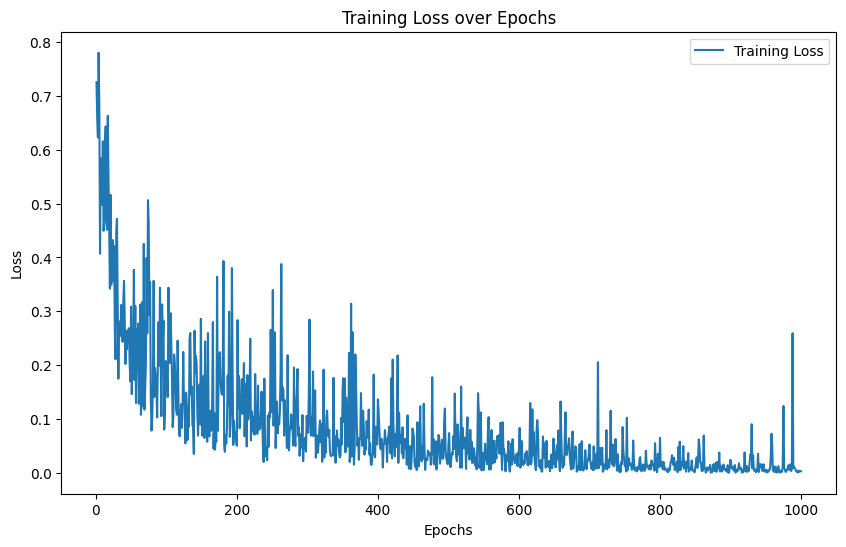

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), loss_values, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()  # Plot the training loss over epochs

In [28]:
model.eval()
with torch.no_grad():  # Bonus: Evaluate the model
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)

print(f'Accuracy of the model on the test set: {accuracy * 100:.2f}%')

Accuracy of the model on the test set: 88.00%


##### **Q18: How do you implement batch training for the softmax classification model?**

In [29]:
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
batch_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

In [30]:
input_size = X_train_tensor.shape[1]
hidden_sizes = [50, 30]
num_classes = 3
num_epochs = 1000
learning_rate = 0.001

model = ExtendedNN(input_size, hidden_sizes, num_classes).to(device)
initialize_weights(model)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [31]:
loss_values = []

for epoch in range(num_epochs):
    for batch_x, batch_y in train_loader:
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    loss_values.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.1096
Epoch [200/1000], Loss: 0.2518
Epoch [300/1000], Loss: 0.0758
Epoch [400/1000], Loss: 0.2938
Epoch [500/1000], Loss: 0.0308
Epoch [600/1000], Loss: 0.0426
Epoch [700/1000], Loss: 0.0058
Epoch [800/1000], Loss: 0.0163
Epoch [900/1000], Loss: 0.0032
Epoch [1000/1000], Loss: 0.0093


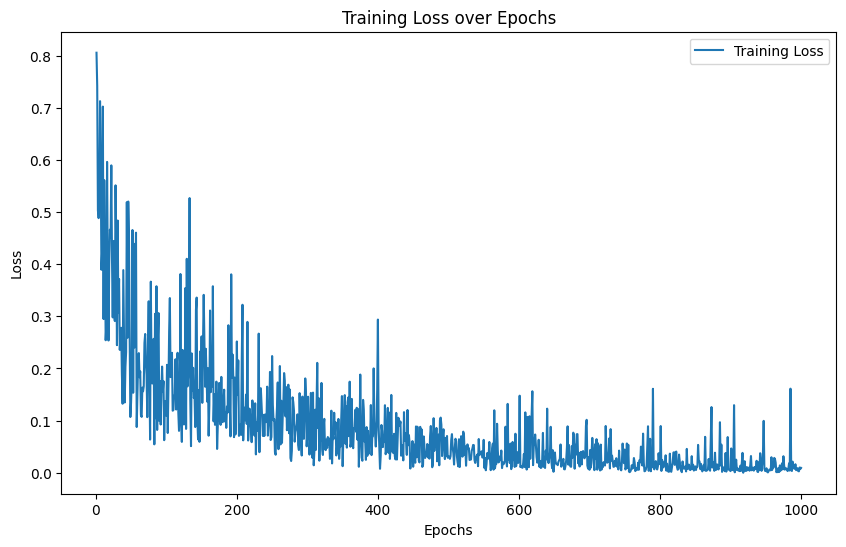

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), loss_values, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

In [33]:
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)

print(f'Accuracy of the model on the test set: {accuracy * 100:.2f}%')

Accuracy of the model on the test set: 87.25%


## Evaluating the model

##### **Q19: How do you make predictions using your trained softmax classification model?**

In [34]:
# Set the model to evaluation mode
# model.eval()  # already done so

with torch.no_grad():  # No gradient calculation needed during inference
    logits = model(X_test_tensor)  # Get raw model outputs (logits)
    
    probabilities = F.softmax(logits, dim=1)  # Apply softmax to get probabilities
    
    _, predicted_classes = torch.max(probabilities, 1)  # Get the predicted class (index of the max probability)

print(predicted_classes[:10])

accuracy = (predicted_classes == y_test_tensor).sum().item() / y_test_tensor.size(0)  # Evaluate the model
print(f'Accuracy of the model on the test set: {accuracy * 100:.2f}%')

tensor([1, 0, 0, 2, 0, 1, 0, 2, 0, 2], device='cuda:0')
Accuracy of the model on the test set: 87.25%


##### **Q20: How do you calculate accuracy and other performance metrics for your model?**

In [35]:
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss

accuracy = accuracy_score(y_test_tensor.cpu(), predicted_classes.cpu())
print(f'Accuracy: {accuracy * 100:.2f}%')

roc_auc = roc_auc_score(y_test_tensor.cpu(), probabilities.cpu(), multi_class='ovr')
print(f'ROC-AUC: {roc_auc:.2f}')

logloss = log_loss(y_test_tensor.cpu(), probabilities.cpu())
print(f'Log Loss: {logloss:.2f}')

Accuracy: 87.25%
ROC-AUC: 0.97
Log Loss: 0.87


##### **Q21: How do you visualize the model's predictions against the actual class labels?**

In [36]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

conf_matrix = confusion_matrix(y_test_tensor.cpu(), predicted_classes.cpu())

fpr, tpr, _ = roc_curve(y_test_tensor.cpu(), probabilities[:, 1].cpu(), pos_label=1)  # ROC Curve (for binary classification or one-vs-rest approach for multi-class)
roc_auc = auc(fpr, tpr)  

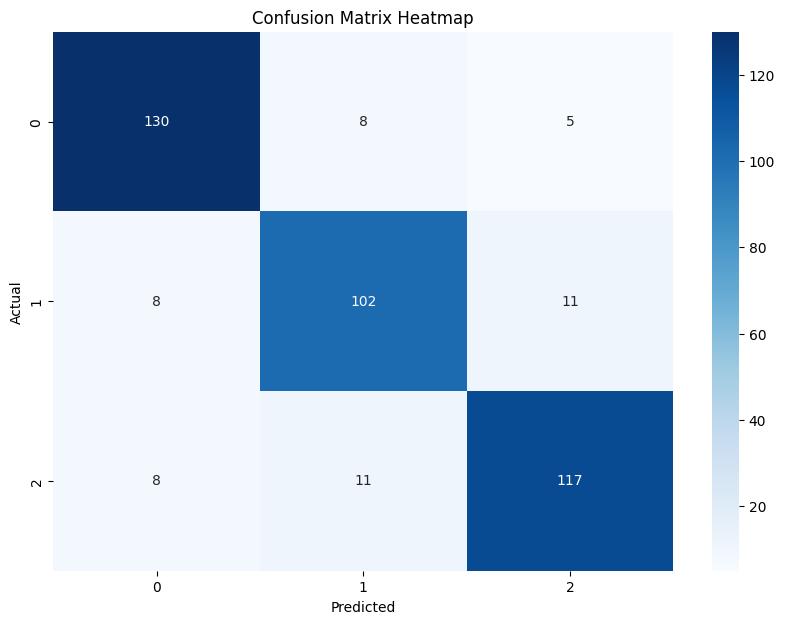

In [37]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

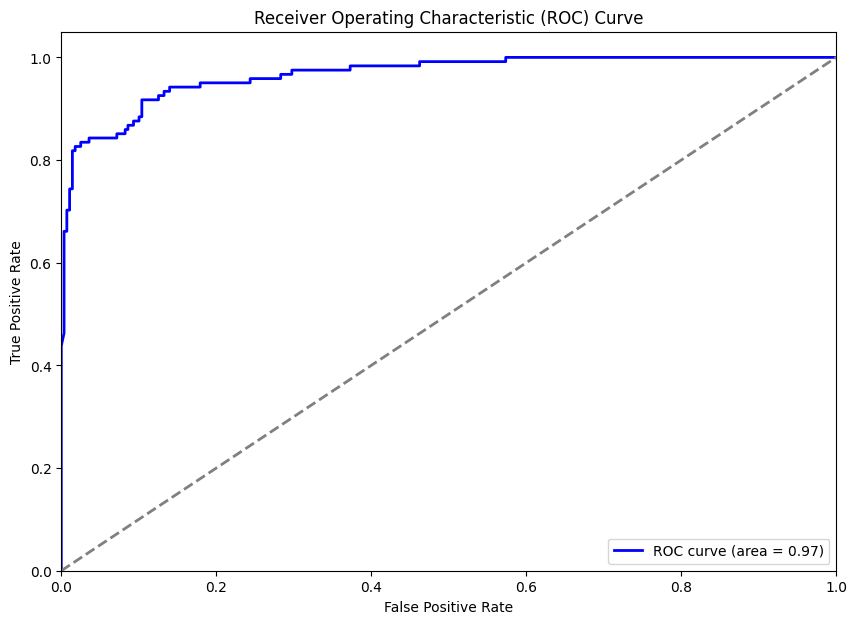

In [38]:
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

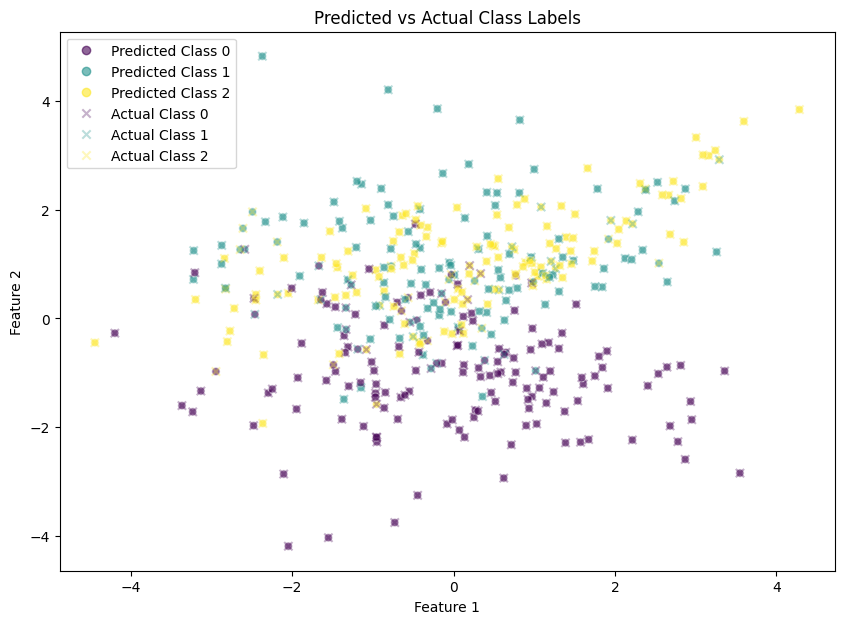

In [39]:
# For multi-class classification visualization:
plt.figure(figsize=(10, 7))

scatter_pred = plt.scatter(X_test[:, 0], X_test[:, 1], c=predicted_classes.cpu(), cmap='viridis', alpha=0.6, edgecolors='w', label='Predicted')  # Plot predicted classes

scatter_actual = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', alpha=0.3, marker='x', label='Actual')  # Plot actual classes with different marker

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Predicted vs Actual Class Labels')

handles_pred = scatter_pred.legend_elements()[0]
handles_actual = scatter_actual.legend_elements()[0]
labels = ['Class 0', 'Class 1', 'Class 2']
plt.legend(handles_pred + handles_actual, [f'Predicted {label}' for label in labels] + [f'Actual {label}' for label in labels])  # Create a legend for predicted and actual classes

plt.show()

##### **Q22: How do you create a confusion matrix to evaluate the performance of your classification model?**

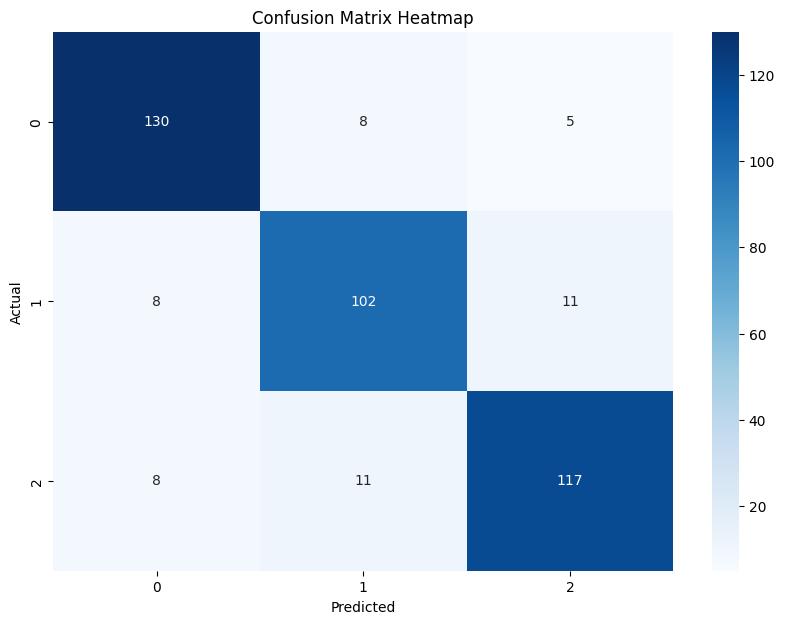

In [40]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

##### **Q23: How do you calculate precision, recall, and F1 score for your model?**

In [41]:
from sklearn.metrics import precision_recall_fscore_support, classification_report

precision, recall, f1, _ = precision_recall_fscore_support(y_test_tensor.cpu(), predicted_classes.cpu(), average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 0.87
Recall: 0.87
F1 Score: 0.87


In [42]:
report = classification_report(y_test_tensor.cpu(), predicted_classes.cpu(), target_names=[f'Class {i}' for i in range(num_classes)])
print(report)

              precision    recall  f1-score   support

     Class 0       0.89      0.91      0.90       143
     Class 1       0.84      0.84      0.84       121
     Class 2       0.88      0.86      0.87       136

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



## Saving and loading the model

##### **Q24: How do you save the trained softmax classification model in PyTorch?**

In [43]:
torch.save(model, 'model_complete.pth')

##### **Q25: How do you load a saved softmax classification model in PyTorch?**

In [44]:
model = torch.load('model_complete.pth')
model.eval()

ExtendedNN(
  (layers): ModuleList(
    (0): Linear(in_features=5, out_features=50, bias=True)
    (1): Linear(in_features=50, out_features=30, bias=True)
  )
  (output_layer): Linear(in_features=30, out_features=3, bias=True)
)

##### **Q26: How do you save and load the model's state dictionary in PyTorch?**

In [45]:
model = ExtendedNN(input_size, hidden_sizes, num_classes).to(device)
initialize_weights(model)

In [46]:
torch.save(model.state_dict(), 'model_state.pth')

In [47]:
model.load_state_dict(torch.load('model_state.pth'))
model.to(device)

model.eval()

ExtendedNN(
  (layers): ModuleList(
    (0): Linear(in_features=5, out_features=50, bias=True)
    (1): Linear(in_features=50, out_features=30, bias=True)
  )
  (output_layer): Linear(in_features=30, out_features=3, bias=True)
)

In [48]:
import os

filenames = ['model_complete.pth', 'model_state.pth']

for filename in filenames:
    if os.path.exists(filename):
        os.remove(filename) 
        print(f'File {filename} deleted.')
    else:
        print(f'File {filename} not found.')

File model_complete.pth deleted.
File model_state.pth deleted.


## Optimizations

##### **Q27: How do you perform hyperparameter tuning to improve the performance of your softmax classification model?**

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

class ExtendedNN(nn.Module):
    def __init__(self, input_size, hidden_sizes, num_classes):
        super(ExtendedNN, self).__init__()
        self.layers = nn.ModuleList()
        current_size = input_size
        for hidden_size in hidden_sizes:
            self.layers.append(nn.Linear(current_size, hidden_size))
            current_size = hidden_size
        self.output_layer = nn.Linear(current_size, num_classes)

    def forward(self, x):
        for layer in self.layers:
            x = F.relu(layer(x))
        x = self.output_layer(x)
        return x

In [50]:
class PyTorchModelWrapper(BaseEstimator, ClassifierMixin):  # Define a model wrapper class for hyperparameter tuning (uses CUDA if available)
    def __init__(self, input_size=5, hidden_sizes=[50], num_classes=3, learning_rate=0.001, num_epochs=100, batch_size=32):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.num_classes = num_classes
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.model = None
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    def _initialize_model(self):
        self.model = ExtendedNN(self.input_size, self.hidden_sizes, self.num_classes).to(self.device)
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        self.criterion = nn.CrossEntropyLoss()
    
    def fit(self, X, y):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        y_tensor = torch.tensor(y, dtype=torch.long).to(self.device)
        dataset = TensorDataset(X_tensor, y_tensor)
        dataloader = DataLoader(dataset, batch_size=self.batch_size, shuffle=True)
        
        self._initialize_model()
        
        for epoch in range(self.num_epochs):
            self.model.train()
            for batch_X, batch_y in dataloader:
                outputs = self.model(batch_X)
                loss = self.criterion(outputs, batch_y)
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()
        
        return self
    
    def predict(self, X):
        self.model.eval()
        with torch.no_grad():
            X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
            outputs = self.model(X_tensor)
            _, predictions = torch.max(outputs, 1)
        return predictions.cpu().numpy()
    
    def score(self, X, y):
        predictions = self.predict(X)
        return accuracy_score(y, predictions)

In [51]:
param_grid = {
    'hidden_sizes': [[50], [100], [50, 30], [100, 50]],
    'learning_rate': [0.01, 0.001, 0.0001],
    'num_epochs': [100, 200],
    'batch_size': [16, 32, 64]
}

In [52]:
grid_search = GridSearchCV(PyTorchModelWrapper(input_size=5, num_classes=3), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

Best parameters found:  {'batch_size': 16, 'hidden_sizes': [100, 50], 'learning_rate': 0.001, 'num_epochs': 100}
Best cross-validation accuracy:  0.8850018621188805


In [53]:
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)  # Evaluate the best model on the test set
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

Test accuracy: 87.00%


##### **Q28: How do you implement dropout regularization in your model to prevent overfitting?**

In [54]:
class ExtendedNN(nn.Module):  # Define the model class with dropout
    def __init__(self, input_size, hidden_sizes, num_classes, dropout_prob=0.5):
        super(ExtendedNN, self).__init__()
        self.layers = nn.ModuleList()
        self.dropouts = nn.ModuleList()
        current_size = input_size
        for hidden_size in hidden_sizes:
            self.layers.append(nn.Linear(current_size, hidden_size))
            self.dropouts.append(nn.Dropout(dropout_prob))
            current_size = hidden_size
        self.output_layer = nn.Linear(current_size, num_classes)

    def forward(self, x):
        for layer, dropout in zip(self.layers, self.dropouts):
            x = F.relu(layer(x))
            x = dropout(x)
        x = self.output_layer(x)
        return x

In [55]:
class PyTorchModelWrapper(BaseEstimator, ClassifierMixin):  # Include dropout probability in the model wrapper
    def __init__(self, input_size=5, hidden_sizes=[50], num_classes=3, learning_rate=0.001, num_epochs=100, batch_size=32, dropout_prob=0.5):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.num_classes = num_classes
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.dropout_prob = dropout_prob
        self.model = None
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    def _initialize_model(self):
        self.model = ExtendedNN(self.input_size, self.hidden_sizes, self.num_classes, self.dropout_prob).to(self.device)
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        self.criterion = nn.CrossEntropyLoss()
    
    def fit(self, X, y):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        y_tensor = torch.tensor(y, dtype=torch.long).to(self.device)
        dataset = TensorDataset(X_tensor, y_tensor)
        dataloader = DataLoader(dataset, batch_size=self.batch_size, shuffle=True)
        
        self._initialize_model()
        
        for epoch in range(self.num_epochs):
            self.model.train()
            for batch_X, batch_y in dataloader:
                outputs = self.model(batch_X)
                loss = self.criterion(outputs, batch_y)
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()
        
        return self
    
    def predict(self, X):
        self.model.eval()
        with torch.no_grad():
            X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
            outputs = self.model(X_tensor)
            _, predictions = torch.max(outputs, 1)
        return predictions.cpu().numpy()
    
    def score(self, X, y):
        predictions = self.predict(X)
        return accuracy_score(y, predictions)

In [57]:
param_grid = {
    'hidden_sizes': [[50], [100], [50, 30], [100, 50]],
    'learning_rate': [0.01, 0.001, 0.0001],
    'num_epochs': [100, 200],
    'batch_size': [16, 32, 64],
    'dropout_prob': [0.3, 0.5, 0.7]  # Include dropout in the hyperparameter search space
}

grid_search = GridSearchCV(PyTorchModelWrapper(input_size=5, num_classes=3), param_grid, cv=3, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=PyTorchModelWrapper(),
             param_grid={'batch_size': [16, 32, 64],
                         'dropout_prob': [0.3, 0.5, 0.7],
                         'hidden_sizes': [[50], [100], [50, 30], [100, 50]],
                         'learning_rate': [0.01, 0.001, 0.0001],
                         'num_epochs': [100, 200]},
             scoring='accuracy', verbose=1)

In [58]:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

Best parameters found:  {'batch_size': 16, 'dropout_prob': 0.3, 'hidden_sizes': [100, 50], 'learning_rate': 0.001, 'num_epochs': 200}
Best cross-validation accuracy:  0.9012596824326066


In [59]:
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

Test accuracy: 89.75%


##### **Q29: How do you use learning rate scheduling to adjust the learning rate during training?**

In [62]:
input_size = X_train.shape[1]
hidden_sizes = [100, 50]
num_classes = 3
learning_rate = 0.001
num_epochs = 200
batch_size = 16
dropout_prob = 0.3  # Use parameters from the best model

model = ExtendedNN(input_size, hidden_sizes, num_classes, dropout_prob).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)  # Choose a learning rate scheduler

In [63]:
for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    scheduler.step()
    
    if (epoch + 1) % 20 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Learning Rate: {scheduler.get_last_lr()}')

Epoch [20/200], Loss: 0.4485, Learning Rate: [1e-05]
Epoch [40/200], Loss: 0.4145, Learning Rate: [1.0000000000000002e-07]
Epoch [60/200], Loss: 0.5964, Learning Rate: [1.0000000000000005e-09]
Epoch [80/200], Loss: 0.5514, Learning Rate: [1.0000000000000006e-11]
Epoch [100/200], Loss: 0.4953, Learning Rate: [1.0000000000000007e-13]
Epoch [120/200], Loss: 0.4409, Learning Rate: [1.0000000000000009e-15]
Epoch [140/200], Loss: 0.6049, Learning Rate: [1.000000000000001e-17]
Epoch [160/200], Loss: 0.5205, Learning Rate: [1.000000000000001e-19]
Epoch [180/200], Loss: 0.5648, Learning Rate: [1.0000000000000012e-21]
Epoch [200/200], Loss: 0.3084, Learning Rate: [1.0000000000000013e-23]


In [64]:
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)

print(f'Accuracy of the model on the test set: {accuracy * 100:.2f}%')

Accuracy of the model on the test set: 85.25%


##### **Q30: How do you use weight decay to regularize the model and prevent overfitting?**

In [68]:
input_size = X_train.shape[1]
hidden_sizes = [100, 50]
num_classes = 3
learning_rate = 0.001
num_epochs = 1000
batch_size = 16
dropout_prob = 0.3
weight_decay = 1e-5  # Include weight decay to the parameters' list

model = ExtendedNN(input_size, hidden_sizes, num_classes, dropout_prob).to(device)

optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)  # Initialize the optimizer with weight decay

scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

criterion = nn.CrossEntropyLoss()

In [69]:
for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    scheduler.step()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Learning Rate: {scheduler.get_last_lr()}')

Epoch [100/1000], Loss: 0.6388, Learning Rate: [1.0000000000000007e-13]
Epoch [200/1000], Loss: 0.4792, Learning Rate: [1.0000000000000013e-23]
Epoch [300/1000], Loss: 0.5813, Learning Rate: [1.0000000000000018e-33]
Epoch [400/1000], Loss: 0.6782, Learning Rate: [1.0000000000000023e-43]
Epoch [500/1000], Loss: 0.3988, Learning Rate: [1.0000000000000027e-53]
Epoch [600/1000], Loss: 0.4486, Learning Rate: [1.0000000000000036e-63]
Epoch [700/1000], Loss: 0.3058, Learning Rate: [1.0000000000000042e-73]
Epoch [800/1000], Loss: 0.7484, Learning Rate: [1.0000000000000048e-83]
Epoch [900/1000], Loss: 0.4487, Learning Rate: [1.0000000000000054e-93]
Epoch [1000/1000], Loss: 0.6469, Learning Rate: [1.0000000000000062e-103]


In [70]:
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)

print(f'Accuracy of the model on the test set: {accuracy * 100:.2f}%')

Accuracy of the model on the test set: 83.50%


##### **Q31: How do you implement early stopping to prevent overfitting during training?**

In [71]:
import numpy as np

n_samples = 2000
n_features = 5
n_classes = 3
X, y = make_classification(n_samples=n_samples, n_features=n_features, n_informative=4, n_redundant=0, n_classes=n_classes, random_state=42)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # validation sets

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_val, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [73]:
input_size = X_train.shape[1]
hidden_sizes = [100, 50]
num_classes = 3
learning_rate = 0.001
num_epochs = 100
batch_size = 16
dropout_prob = 0.3
weight_decay = 1e-5
patience = 10  # Number of epochs to wait for improvement

model = ExtendedNN(input_size, hidden_sizes, num_classes, dropout_prob).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
criterion = nn.CrossEntropyLoss()

best_val_loss = np.inf
patience_counter = 0

In [74]:
for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    scheduler.step()
    
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            val_loss += loss.item()
    
    val_loss /= len(val_loader)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss:.4f}, Learning Rate: {scheduler.get_last_lr()}')
    
    if val_loss < best_val_loss:  # Early stopping
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), 'best_model.pth')  # Save the best model
    else:
        patience_counter += 1
    
    if patience_counter >= patience:
        print("Early stopping triggered.")
        break

Epoch [1/100], Training Loss: 0.7655, Validation Loss: 0.7496, Learning Rate: [0.001]
Epoch [2/100], Training Loss: 0.5818, Validation Loss: 0.6258, Learning Rate: [0.001]
Epoch [3/100], Training Loss: 0.5165, Validation Loss: 0.5791, Learning Rate: [0.001]
Epoch [4/100], Training Loss: 0.4913, Validation Loss: 0.5467, Learning Rate: [0.001]
Epoch [5/100], Training Loss: 0.3864, Validation Loss: 0.5278, Learning Rate: [0.001]
Epoch [6/100], Training Loss: 0.4051, Validation Loss: 0.4992, Learning Rate: [0.001]
Epoch [7/100], Training Loss: 0.3329, Validation Loss: 0.4967, Learning Rate: [0.001]
Epoch [8/100], Training Loss: 0.3386, Validation Loss: 0.4773, Learning Rate: [0.001]
Epoch [9/100], Training Loss: 0.3276, Validation Loss: 0.4612, Learning Rate: [0.001]
Epoch [10/100], Training Loss: 0.2824, Validation Loss: 0.4558, Learning Rate: [0.0001]
Epoch [11/100], Training Loss: 0.2870, Validation Loss: 0.4526, Learning Rate: [0.0001]
Epoch [12/100], Training Loss: 0.2887, Validation 

In [75]:
model.load_state_dict(torch.load('best_model.pth'))

model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)

print(f'Accuracy of the model on the test set: {accuracy * 100:.2f}%')

Accuracy of the model on the test set: 79.00%


In [76]:
filenames = ['best_model.pth']

for filename in filenames:
    if os.path.exists(filename):
        os.remove(filename) 
        print(f'File {filename} deleted.')
    else:
        print(f'File {filename} not found.')

File best_model.pth deleted.


## Handling real-world data

##### **Q32: How do you preprocess a real-world dataset for softmax classification in PyTorch?**

In [106]:
import pandas as pd
from sklearn.datasets import load_iris

data = load_iris()  # Load the Iris dataset
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [107]:
print(df.isnull().sum())  # Check for missing values

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [108]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [109]:
print(X_train.shape)
print(X_test.shape)

(105, 4)
(45, 4)


In [110]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [111]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long).to(device)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 4
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

##### **Q33: How do you handle missing data in your dataset before training the model?**

In [94]:
np.random.seed(42)
n_samples = 1000
n_features = 5

X = np.random.randn(n_samples, n_features)

missing_mask = np.random.rand(n_samples, n_features) < 0.1
X[missing_mask] = np.nan  # Introduce missing values in 10% of the data

y = np.random.randint(0, 3, size=n_samples)

df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(n_features)])
df['target'] = y  # Convert to DataFrame

print(df.head(), '\n')
print(df.isnull().sum())

   feature_0  feature_1  feature_2  feature_3  feature_4  target
0   0.496714  -0.138264   0.647689   1.523030  -0.234153       1
1  -0.234137   1.579213   0.767435  -0.469474        NaN       2
2  -0.463418  -0.465730   0.241962  -1.913280        NaN       1
3  -0.562288        NaN   0.314247  -0.908024  -1.412304       2
4   1.465649  -0.225776   0.067528  -1.424748        NaN       2 

feature_0    100
feature_1     96
feature_2     89
feature_3    111
feature_4    106
target         0
dtype: int64


In [95]:
df_dropped = df.dropna()  # Remove rows with missing values
print("After dropping missing values:")
print(df_dropped.isnull().sum())

After dropping missing values:
feature_0    0
feature_1    0
feature_2    0
feature_3    0
feature_4    0
target       0
dtype: int64


In [96]:
df_mean_imputed = df.fillna(df.mean())  # Impute missing values with the mean
print("After mean imputation:")
print(df_mean_imputed.isnull().sum())

After mean imputation:
feature_0    0
feature_1    0
feature_2    0
feature_3    0
feature_4    0
target       0
dtype: int64


In [97]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_knn_imputed = pd.DataFrame(imputer.fit_transform(df.drop(columns=['target'])), columns=[f'feature_{i}' for i in range(n_features)])  # Impute missing values using KNN
df_knn_imputed['target'] = df['target'].values

print("After KNN imputation:")
print(df_knn_imputed.isnull().sum())

After KNN imputation:
feature_0    0
feature_1    0
feature_2    0
feature_3    0
feature_4    0
target       0
dtype: int64


In [99]:
df_processed = df_knn_imputed  # Choose the imputed dataset for further processing

print("Processed dataset:")
print(df_processed.head(), '\n')
print(df_processed.isnull().sum())

Processed dataset:
   feature_0  feature_1  feature_2  feature_3  feature_4  target
0   0.496714  -0.138264   0.647689   1.523030  -0.234153       1
1  -0.234137   1.579213   0.767435  -0.469474  -0.360597       2
2  -0.463418  -0.465730   0.241962  -1.913280  -0.538056       1
3  -0.562288   0.901806   0.314247  -0.908024  -1.412304       2
4   1.465649  -0.225776   0.067528  -1.424748  -0.588287       2 

feature_0    0
feature_1    0
feature_2    0
feature_3    0
feature_4    0
target       0
dtype: int64


##### **Q34: How do you encode categorical variables for use in a softmax classification model?**

In [101]:
np.random.seed(42)
n_samples = 1000

data = {
    'feature_num': np.random.randn(n_samples),
    'feature_cat': np.random.choice(['A', 'B', 'C'], n_samples),
    'target': np.random.choice(['class_1', 'class_2', 'class_3'], n_samples)  # Generate random categorical and numerical data
}

df = pd.DataFrame(data)
df.head()

,feature_num,feature_cat,target
0,0.496714,C,class_1
1,-0.138264,A,class_2
2,0.647689,C,class_2
3,1.523030,A,class_2
4,-0.234153,C,class_1


In [102]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()  # One way to proceed: label encoding for ordinal categorical variables

df['feature_cat_encoded'] = label_encoder.fit_transform(df['feature_cat'])  # Apply label encoding to the 'feature_cat' column
df.head()

,feature_num,feature_cat,target,feature_cat_encoded
0,0.496714,C,class_1,2
1,-0.138264,A,class_2,0
2,0.647689,C,class_2,2
3,1.523030,A,class_2,0
4,-0.234153,C,class_1,2


In [104]:
df_one_hot = pd.get_dummies(df, columns=['feature_cat'])  # Alternative: one-hot encoding for non-ordinal categorical variables
df_one_hot.head()

,feature_num,target,feature_cat_encoded,feature_cat_A,feature_cat_B,feature_cat_C
0,0.496714,class_1,2,0,0,1
1,-0.138264,class_2,0,1,0,0
2,0.647689,class_2,2,0,0,1
3,1.523030,class_2,0,1,0,0
4,-0.234153,class_1,2,0,0,1


In [105]:
df['target_encoded'] = label_encoder.fit_transform(df['target'])  # Finally, apply label encoding to the 'target' column
df.head()

,feature_num,feature_cat,target,feature_cat_encoded,target_encoded
0,0.496714,C,class_1,2,0
1,-0.138264,A,class_2,0,1
2,0.647689,C,class_2,2,1
3,1.523030,A,class_2,0,1
4,-0.234153,C,class_1,2,0


##### **Q35: How do you split a real-world dataset into training, validation, and test sets?**

In [114]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, delimiter=';')
print(df.head(), '\n')
print(df.info())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [115]:
print(df.isnull().sum())

# Fill missing values or drop rows/columns with missing values (if necessary)
# df.fillna(df.mean(), inplace=True)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [116]:
# If there were categorical features, you could use:
# df = pd.get_dummies(df, columns=['categorical_column'])

# For label encoding:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# df['encoded_column'] = label_encoder.fit_transform(df['categorical_column'])

In [117]:
# Dataset split
# from sklearn.model_selection import train_test_split  # previously loaded

X = df.drop('quality', axis=1).values
y = df['quality'].values  # Separate features and target

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # Split into training and test sets first (70% train, 30% temp)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Split the temp set into validation and test sets (50% val, 50% test)

print("Complete set size:", X.shape)
print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)

Complete set size: (1599, 11)
Training set size: (1119, 11)
Validation set size: (240, 11)
Test set size: (240, 11)


##### **Q36: How do you train your softmax classification model on a real-world dataset?**

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
columns = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(30)]
df = pd.read_csv(url, header=None, names=columns)

df = df.drop('ID', axis=1)  # Drop the ID column

df['Diagnosis'] = df['Diagnosis'].map({'B': 0, 'M': 1})  # Convert Diagnosis to numeric (Benign=0, Malignant=1)

X = df.drop('Diagnosis', axis=1).values
y = df['Diagnosis'].values

print("Unique target values:", np.unique(y))  # Check the unique target values
print("Target range:", y.min(), y.max())

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Shapes:")
print("X_train:", X_train.shape)
print("X_val:", X_val.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_val:", y_val.shape)
print("y_test:", y_test.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

print("Tensor Types and Shapes:")
print("X_train_tensor:", X_train_tensor.dtype, X_train_tensor.shape)
print("y_train_tensor:", y_train_tensor.dtype, y_train_tensor.shape)
print("X_val_tensor:", X_val_tensor.dtype, X_val_tensor.shape)
print("y_val_tensor:", y_val_tensor.dtype, y_val_tensor.shape)
print("X_test_tensor:", X_test_tensor.dtype, X_test_tensor.shape)
print("y_test_tensor:", y_test_tensor.dtype, y_test_tensor.shape)  # Print tensor types and shapes to verify correctness

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Unique target values: [0 1]
Target range: 0 1
Shapes:
X_train: (398, 30)
X_val: (85, 30)
X_test: (86, 30)
y_train: (398,)
y_val: (85,)
y_test: (86,)
Tensor Types and Shapes:
X_train_tensor: torch.float32 torch.Size([398, 30])
y_train_tensor: torch.int64 torch.Size([398])
X_val_tensor: torch.float32 torch.Size([85, 30])
y_val_tensor: torch.int64 torch.Size([85])
X_test_tensor: torch.float32 torch.Size([86, 30])
y_test_tensor: torch.int64 torch.Size([86])


In [3]:
class BreastCancerClassificationModel(nn.Module):
    def __init__(self, input_size):
        super(BreastCancerClassificationModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 2)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output(x)
        return x

input_size = X_train.shape[1]

model = BreastCancerClassificationModel(input_size)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [4]:
num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)  # Move tensors to the appropriate device
        
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += batch_y.size(0)
            correct += (predicted == batch_y).sum().item()
    
    val_loss /= len(val_loader)
    val_accuracy = correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy*100:.2f}%')

Epoch [1/50], Loss: 0.6129, Val Loss: 0.5139, Val Accuracy: 94.12%
Epoch [2/50], Loss: 0.4506, Val Loss: 0.3461, Val Accuracy: 92.94%
Epoch [3/50], Loss: 0.2890, Val Loss: 0.2053, Val Accuracy: 94.12%
Epoch [4/50], Loss: 0.1729, Val Loss: 0.1321, Val Accuracy: 95.29%
Epoch [5/50], Loss: 0.1221, Val Loss: 0.1023, Val Accuracy: 95.29%
Epoch [6/50], Loss: 0.1099, Val Loss: 0.0887, Val Accuracy: 96.47%
Epoch [7/50], Loss: 0.0893, Val Loss: 0.0825, Val Accuracy: 96.47%
Epoch [8/50], Loss: 0.0776, Val Loss: 0.0800, Val Accuracy: 96.47%
Epoch [9/50], Loss: 0.0669, Val Loss: 0.0768, Val Accuracy: 97.65%
Epoch [10/50], Loss: 0.0669, Val Loss: 0.0754, Val Accuracy: 97.65%
Epoch [11/50], Loss: 0.0551, Val Loss: 0.0772, Val Accuracy: 96.47%
Epoch [12/50], Loss: 0.0646, Val Loss: 0.0776, Val Accuracy: 96.47%
Epoch [13/50], Loss: 0.0502, Val Loss: 0.0770, Val Accuracy: 97.65%
Epoch [14/50], Loss: 0.0441, Val Loss: 0.0797, Val Accuracy: 97.65%
Epoch [15/50], Loss: 0.0436, Val Loss: 0.0801, Val Accura

In [6]:
torch.save(model.state_dict(), 'breast_cancer_classification_model.pth')

##### **Q37: How do you evaluate your model's performance on a real-world dataset?**

In [7]:
model.load_state_dict(torch.load('breast_cancer_classification_model.pth'))
model.to(device)
model.eval()

test_loss = 0.0
correct = 0
total = 0
with torch.no_grad():  # Evaluate on the test set
    for batch_X, batch_y in test_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()

test_loss /= len(test_loader)
test_accuracy = correct / total
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy*100:.2f}%')

Test Loss: 0.0049, Test Accuracy: 100.00%


In [9]:
filenames = ['breast_cancer_classification_model.pth']

for filename in filenames:
    if os.path.exists(filename):
        os.remove(filename) 
        print(f'File {filename} deleted.')
    else:
        print(f'File {filename} not found.')

File breast_cancer_classification_model.pth deleted.


##### **Q38: How do you handle imbalanced classes in a real-world dataset?**

In [ ]:
# Several ways to approach this. e.g.,
# - Resampling, oversampling minority classes and/or undersampling majority classes
# - Synthetic data generation (i.e., SMOTE)
# - Class weights
# - Anomaly detection
# - Ensemble methods

In [10]:
from sklearn.utils.class_weight import compute_class_weight

class BreastCancerClassificationModel(nn.Module):
    def __init__(self, input_size):
        super(BreastCancerClassificationModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 2)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output(x)
        return x

input_size = X_train.shape[1]

model = BreastCancerClassificationModel(input_size)
model.to(device)

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)  # Compute class weights
class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [11]:
num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += batch_y.size(0)
            correct += (predicted == batch_y).sum().item()
    
    val_loss /= len(val_loader)
    val_accuracy = correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy*100:.2f}%')

Epoch [1/50], Loss: 0.6074, Val Loss: 0.5015, Val Accuracy: 91.76%
Epoch [2/50], Loss: 0.4596, Val Loss: 0.3525, Val Accuracy: 92.94%
Epoch [3/50], Loss: 0.3293, Val Loss: 0.2456, Val Accuracy: 92.94%
Epoch [4/50], Loss: 0.2248, Val Loss: 0.1624, Val Accuracy: 94.12%
Epoch [5/50], Loss: 0.1522, Val Loss: 0.1155, Val Accuracy: 95.29%
Epoch [6/50], Loss: 0.1277, Val Loss: 0.0955, Val Accuracy: 95.29%
Epoch [7/50], Loss: 0.1000, Val Loss: 0.0901, Val Accuracy: 94.12%
Epoch [8/50], Loss: 0.0832, Val Loss: 0.0862, Val Accuracy: 95.29%
Epoch [9/50], Loss: 0.0744, Val Loss: 0.0865, Val Accuracy: 95.29%
Epoch [10/50], Loss: 0.0662, Val Loss: 0.0880, Val Accuracy: 96.47%
Epoch [11/50], Loss: 0.0704, Val Loss: 0.0892, Val Accuracy: 97.65%
Epoch [12/50], Loss: 0.0575, Val Loss: 0.0914, Val Accuracy: 97.65%
Epoch [13/50], Loss: 0.0618, Val Loss: 0.0941, Val Accuracy: 97.65%
Epoch [14/50], Loss: 0.0494, Val Loss: 0.0953, Val Accuracy: 97.65%
Epoch [15/50], Loss: 0.0482, Val Loss: 0.0987, Val Accura

In [12]:
torch.save(model.state_dict(), 'breast_cancer_classification_model.pth')

In [13]:
model.load_state_dict(torch.load('breast_cancer_classification_model.pth'))
model.to(device)
model.eval()

test_loss = 0.0
correct = 0
total = 0
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()

test_loss /= len(test_loader)
test_accuracy = correct / total
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy*100:.2f}%')

Test Loss: 0.0173, Test Accuracy: 100.00%


In [14]:
filenames = ['breast_cancer_classification_model.pth']

for filename in filenames:
    if os.path.exists(filename):
        os.remove(filename) 
        print(f'File {filename} deleted.')
    else:
        print(f'File {filename} not found.')

File breast_cancer_classification_model.pth deleted.


## Further exercises

##### **Q39: How do you implement a softmax function from scratch without using PyTorch's built-in functions?**

In [15]:
# Exponentiate and normalize the inputs. i.e.,
def softmax(x):
    """
    Compute the softmax of vector x.
    
    Parameters:
    x (numpy.ndarray): Input array or vector.
    
    Returns:
    numpy.ndarray: Softmax probabilities.
    """
    shift_x = x - np.max(x)
    exp_x = np.exp(shift_x)  # Shift the inputs to prevent overflow
    sum_exp_x = np.sum(exp_x)
    return exp_x / sum_exp_x

In [16]:
x = np.array([2.0, 1.0, 0.1])
print("Input:", x)
print("Softmax probabilities:", softmax(x))  # Test the softmax function

Input: [2.  1.  0.1]
Softmax probabilities: [0.65900114 0.24243297 0.09856589]


In [17]:
# In a neural network:
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros(hidden_size)
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros(output_size)
    
    def forward(self, x):
        z1 = np.dot(x, self.W1) + self.b1
        a1 = np.tanh(z1)  # Hidden layer
        
        z2 = np.dot(a1, self.W2) + self.b2  # Output layer
        output = softmax(z2)
        return output

In [18]:
np.random.seed(0)
input_size = 3
hidden_size = 5
output_size = 3
model = SimpleNeuralNetwork(input_size, hidden_size, output_size)

x = np.array([1.0, 2.0, 3.0])  # Example input
output = model.forward(x)
print("Network output probabilities:", output)

Network output probabilities: [0.92622698 0.06697331 0.00679971]


##### **Q40: How do you experiment with different neural network architectures to see their impact on classification performance?**

In [19]:
num_features = 20
num_classes = 3
num_samples = 3000

np.random.seed(0)
X = np.random.randn(num_samples, num_features)

y = np.random.choice(num_classes, num_samples)

df = pd.DataFrame(X, columns=[f'feature_{i+1}' for i in range(num_features)])
df['target'] = y

print("Synthetic DataFrame:")
print(df.head())

Synthetic DataFrame:
   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   1.764052   0.400157   0.978738   2.240893   1.867558  -0.977278   
1  -2.552990   0.653619   0.864436  -0.742165   2.269755  -1.454366   
2  -1.048553  -1.420018  -1.706270   1.950775  -0.509652  -0.438074   
3  -0.672460  -0.359553  -0.813146  -1.726283   0.177426  -0.401781   
4  -1.165150   0.900826   0.465662  -1.536244   1.488252   1.895889   

   feature_7  feature_8  feature_9  feature_10  ...  feature_12  feature_13  \
0   0.950088  -0.151357  -0.103219    0.410599  ...    1.454274    0.761038   
1   0.045759  -0.187184   1.532779    1.469359  ...    0.378163   -0.887786   
2  -1.252795   0.777490  -1.613898   -0.212740  ...    0.386902   -0.510805   
3  -1.630198   0.462782  -0.907298    0.051945  ...    0.128983    1.139401   
4   1.178780  -0.179925  -1.070753    1.054452  ...    1.222445    0.208275   

   feature_14  feature_15  feature_16  feature_17  feature_18  feature_19  \


In [20]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [24]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, output_size)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class DeeperNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(DeeperNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, output_size)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class WiderNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(WiderNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_size)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [25]:
def train_model(model, train_loader, val_loader, num_epochs, device):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    model.to(device)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)

            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for batch_X, batch_y in val_loader:
                batch_X, batch_y = batch_X.to(device), batch_y.to(device)
                outputs = model(batch_X)
                loss = criterion(outputs, batch_y)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += batch_y.size(0)
                val_correct += (predicted == batch_y).sum().item()

        val_loss /= len(val_loader)
        val_accuracy = val_correct / val_total
        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy*100:.2f}%')

    return model

def evaluate_model(model, test_loader, device):
    model.eval()
    test_correct = 0
    test_total = 0
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            outputs = model(batch_X)
            _, predicted = torch.max(outputs.data, 1)
            test_total += batch_y.size(0)
            test_correct += (predicted == batch_y).sum().item()

    test_accuracy = test_correct / test_total
    return test_accuracy

In [26]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size = X_train.shape[1]
output_size = 3

simple_nn = SimpleNN(input_size, output_size)
deeper_nn = DeeperNN(input_size, output_size)
wider_nn = WiderNN(input_size, output_size)

print("Training SimpleNN...")
simple_nn = train_model(simple_nn, train_loader, val_loader, num_epochs=500, device=device)
simple_nn_test_accuracy = evaluate_model(simple_nn, test_loader, device)
print(f'SimpleNN Test Accuracy: {simple_nn_test_accuracy*100:.2f}%')

print("Training DeeperNN...")
deeper_nn = train_model(deeper_nn, train_loader, val_loader, num_epochs=500, device=device)
deeper_nn_test_accuracy = evaluate_model(deeper_nn, test_loader, device)
print(f'DeeperNN Test Accuracy: {deeper_nn_test_accuracy*100:.2f}%')

print("Training WiderNN...")
wider_nn = train_model(wider_nn, train_loader, val_loader, num_epochs=500, device=device)
wider_nn_test_accuracy = evaluate_model(wider_nn, test_loader, device)
print(f'WiderNN Test Accuracy: {wider_nn_test_accuracy*100:.2f}%')

print(f'Comparison of Test Accuracies:')
print(f'SimpleNN: {simple_nn_test_accuracy*100:.2f}%')
print(f'DeeperNN: {deeper_nn_test_accuracy*100:.2f}%')
print(f'WiderNN: {wider_nn_test_accuracy*100:.2f}%')

Training SimpleNN...
Epoch [100/500], Loss: 0.9241, Val Loss: 1.2749, Val Accuracy: 33.56%
Epoch [200/500], Loss: 0.8844, Val Loss: 1.3539, Val Accuracy: 33.33%
Epoch [300/500], Loss: 0.8555, Val Loss: 1.4217, Val Accuracy: 32.44%
Epoch [400/500], Loss: 0.8408, Val Loss: 1.4794, Val Accuracy: 32.00%
Epoch [500/500], Loss: 0.8250, Val Loss: 1.5164, Val Accuracy: 32.67%
SimpleNN Test Accuracy: 29.78%
Training DeeperNN...
Epoch [100/500], Loss: 0.2115, Val Loss: 2.5191, Val Accuracy: 37.11%
Epoch [200/500], Loss: 0.0160, Val Loss: 5.1954, Val Accuracy: 36.44%
Epoch [300/500], Loss: 0.0021, Val Loss: 7.0720, Val Accuracy: 35.33%
Epoch [400/500], Loss: 0.0008, Val Loss: 8.7702, Val Accuracy: 34.00%
Epoch [500/500], Loss: 0.0002, Val Loss: 9.6036, Val Accuracy: 33.78%
DeeperNN Test Accuracy: 30.67%
Training WiderNN...
Epoch [100/500], Loss: 0.0057, Val Loss: 4.2204, Val Accuracy: 32.00%
Epoch [200/500], Loss: 0.0001, Val Loss: 6.9030, Val Accuracy: 30.89%
Epoch [300/500], Loss: 0.0000, Val L

##### **Q41: How do you apply transfer learning to a softmax classification problem using a pre-trained model?**

In [52]:
from torch.utils.data import random_split
from torchvision import models, transforms

num_samples = 1000
num_classes = 3
num_features = 3  # RGB channels

np.random.seed(0)  # Randomly generate images and labels
X = np.random.rand(num_samples, num_features, 64, 64).astype(np.float32)  # Simulate 64x64 RGB images
y = np.random.randint(0, num_classes, num_samples).astype(np.int64)

X_tensor = torch.tensor(X)
y_tensor = torch.tensor(y)

train_size = int(0.8 * num_samples)
val_size = num_samples - train_size
train_dataset, val_dataset = random_split(TensorDataset(X_tensor, y_tensor), [train_size, val_size])

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [53]:
model = models.resnet18(pretrained=True)  # Load a pre-trained ResNet model

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes)  # Modify the final layer to match the number of classes in our target task

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [54]:
for param in model.parameters():  # Optionally, freeze all layers except the final layer
    param.requires_grad = False

for param in model.fc.parameters():  # Unfreeze the final layer
    param.requires_grad = True

In [55]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

In [56]:
num_epochs = 1000

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device, dtype=torch.long)

        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device, dtype=torch.long)
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += batch_y.size(0)
            val_correct += (predicted == batch_y).sum().item()

    val_loss /= len(val_loader)
    val_accuracy = val_correct / val_total
    if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy*100:.2f}%')

Epoch [100/1000], Loss: 0.7874, Val Loss: 1.6161, Val Accuracy: 34.50%
Epoch [200/1000], Loss: 0.7012, Val Loss: 1.6645, Val Accuracy: 34.00%
Epoch [300/1000], Loss: 0.7144, Val Loss: 1.6728, Val Accuracy: 35.50%
Epoch [400/1000], Loss: 0.7289, Val Loss: 1.7795, Val Accuracy: 36.00%
Epoch [500/1000], Loss: 0.6946, Val Loss: 1.7786, Val Accuracy: 37.00%
Epoch [600/1000], Loss: 0.7112, Val Loss: 1.8186, Val Accuracy: 33.50%
Epoch [700/1000], Loss: 0.6979, Val Loss: 1.8657, Val Accuracy: 37.00%
Epoch [800/1000], Loss: 0.6492, Val Loss: 1.8243, Val Accuracy: 33.50%
Epoch [900/1000], Loss: 0.7157, Val Loss: 1.8817, Val Accuracy: 36.00%
Epoch [1000/1000], Loss: 0.6972, Val Loss: 1.7787, Val Accuracy: 37.00%


In [ ]:
# Save the fine-tuned model
# torch.save(model.state_dict(), 'fine_tuned_resnet.pth')

##### **Q42: How do you visualize the learned features of your model using techniques such as t-SNE or PCA?**

In [57]:
num_features = 20
num_classes = 3
num_samples = 3000

np.random.seed(0)
X = np.random.randn(num_samples, num_features)

y = np.random.choice(num_classes, num_samples)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [58]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def extract_features(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x

input_size = num_features
hidden_size = 50
output_size = num_classes

model = SimpleNN(input_size, hidden_size, output_size)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [59]:
num_epochs = 500

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)

        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += batch_y.size(0)
            val_correct += (predicted == batch_y).sum().item()

    val_loss /= len(val_loader)
    val_accuracy = val_correct / val_total
    if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy*100:.2f}%')

Epoch [100/500], Loss: 0.2380, Val Loss: 2.4411, Val Accuracy: 30.22%
Epoch [200/500], Loss: 0.0181, Val Loss: 5.1419, Val Accuracy: 33.78%
Epoch [300/500], Loss: 0.0022, Val Loss: 7.0806, Val Accuracy: 32.22%
Epoch [400/500], Loss: 0.0006, Val Loss: 8.8135, Val Accuracy: 35.56%
Epoch [500/500], Loss: 0.0001, Val Loss: 9.6644, Val Accuracy: 34.22%


In [60]:
model.eval()
features = []
labels = []

with torch.no_grad():  # Extract features from the penultimate layer
    for batch_X, batch_y in test_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        feature_batch = model.extract_features(batch_X)
        features.append(feature_batch.cpu().numpy())
        labels.append(batch_y.cpu().numpy())

features = np.concatenate(features)
labels = np.concatenate(labels)

In [61]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)  # Apply PCA

tsne = TSNE(n_components=2, random_state=0)
tsne_result = tsne.fit_transform(features)  # Apply t-SNE

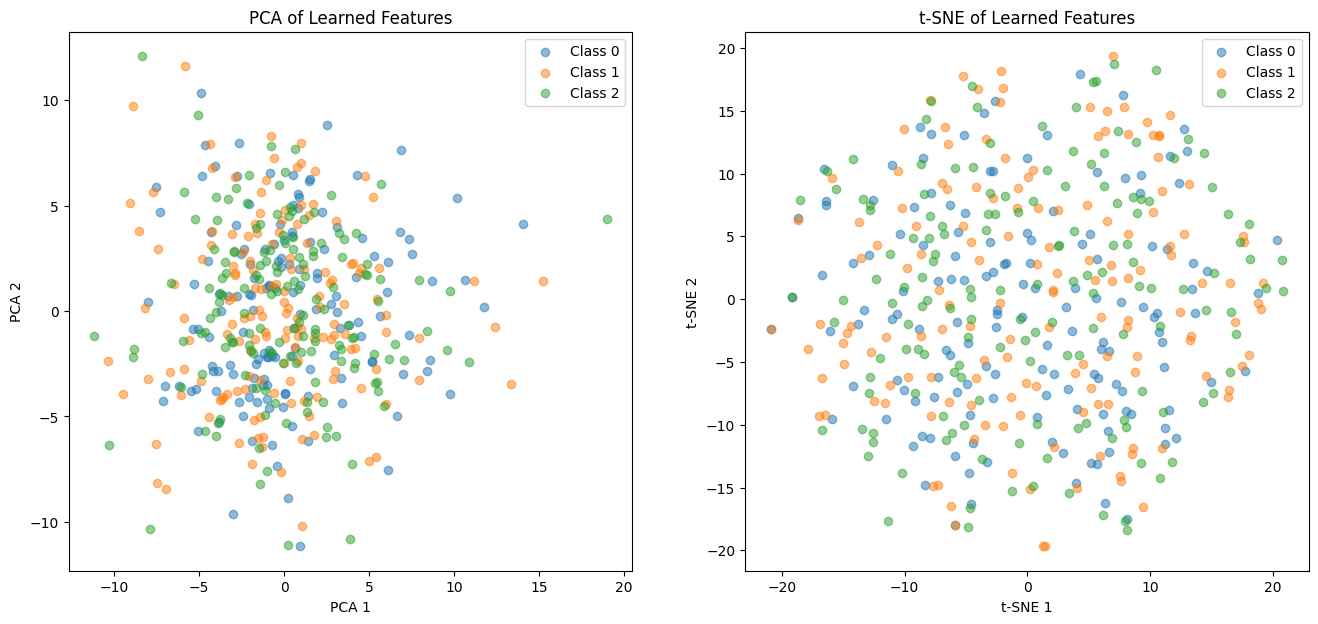

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 7))

plt.subplot(1, 2, 1)
for i in range(num_classes):
    plt.scatter(pca_result[labels == i, 0], pca_result[labels == i, 1], label=f'Class {i}', alpha=0.5)
plt.title('PCA of Learned Features')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()

plt.subplot(1, 2, 2)
for i in range(num_classes):
    plt.scatter(tsne_result[labels == i, 0], tsne_result[labels == i, 1], label=f'Class {i}', alpha=0.5)
plt.title('t-SNE of Learned Features')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()

plt.show()

##### **Q43: How do you perform data augmentation on your training dataset to improve the robustness of your classification model?**

In [63]:
# Define a series of transformations for data augmentation:
data_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),  # Randomly flip images horizontally
    transforms.RandomVerticalFlip(p=0.5),    # Randomly flip images vertically
    transforms.RandomRotation(degrees=20),   # Randomly rotate images
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # Randomly change brightness, contrast, etc.
    transforms.RandomResizedCrop(size=64, scale=(0.8, 1.0)),  # Randomly crop and resize images
    transforms.ToTensor(),                   # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize images
])

In [64]:
from torchvision.datasets import FakeData

train_dataset = FakeData(transform=data_transforms)  # Create a synthetic dataset (using FakeData for demonstration purposes)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [66]:
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)  # Load a pre-trained model and modify the final layer
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [67]:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)

        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

Epoch [1/10], Loss: 2.6107
Epoch [2/10], Loss: 2.3783
Epoch [3/10], Loss: 2.3714
Epoch [4/10], Loss: 2.3495
Epoch [5/10], Loss: 2.3683
Epoch [6/10], Loss: 2.3355
Epoch [7/10], Loss: 2.3813
Epoch [8/10], Loss: 2.3601
Epoch [9/10], Loss: 2.3540
Epoch [10/10], Loss: 2.3541
